<a href="https://colab.research.google.com/github/joshIsac/sem-2-lab-/blob/main/decision_tree_classifier_using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [101]:
data=pd.read_csv('/content/drive/MyDrive/car_data.csv')
data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [102]:
df=pd.DataFrame(data)
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [103]:
df.isnull().sum()


User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [104]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [105]:
df.shape

(1000, 5)

In [106]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df['Gender']=lab_enc.fit_transform(df['Gender'])
print(df)

     User ID  Gender  Age  AnnualSalary  Purchased
0        385       1   35         20000          0
1        681       1   40         43500          0
2        353       1   49         74000          0
3        895       1   40        107500          1
4        661       1   25         79000          0
..       ...     ...  ...           ...        ...
995      863       1   38         59000          0
996      800       0   47         23500          0
997      407       0   28        138500          1
998      299       0   48        134000          1
999      687       0   44         73500          0

[1000 rows x 5 columns]


In [107]:
#assuming purchased be the target variable
X=df.drop(['User ID','Purchased'],axis=1)
y=df['Purchased']

In [108]:
X

,Gender,Age,AnnualSalary
0,1,35,20000
1,1,40,43500
2,1,49,74000
3,1,40,107500
4,1,25,79000
...,...,...,...
995,1,38,59000
996,0,47,23500
997,0,28,138500
998,0,48,134000


In [109]:
df1=pd.DataFrame({'Purchased':df['Purchased']})
df1

,Purchased
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,1
998,1


In [110]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=44)


In [111]:
y_test.shape

(300,)

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier(random_state=44)

In [113]:
dt_cls.fit(x_train,y_train)

DecisionTreeClassifier(random_state=44)

In [114]:
y_predict=dt_cls.predict(x_test)
y_predict

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [115]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.89

In [116]:
from sklearn.metrics import confusion_matrix
cnf= confusion_matrix(y_test, y_predict)
cnf

array([[166,  15],
       [ 18, 101]])

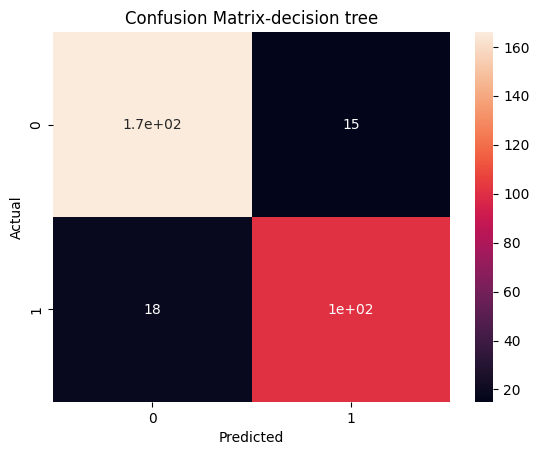

In [117]:
import seaborn as sn
sn.heatmap(cnf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix-decision tree')
plt.show()

In [118]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [121]:
from sklearn.tree import DecisionTreeRegressor

In [122]:
from sklearn.metrics import mean_squared_error
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train)

# Make predictions
y_predict_regressor = dt_regressor.predict(x_test)

# Calculate mean squared error
mse_regressor = mean_squared_error(y_test, y_predict_regressor)

In [123]:
mse_regressor

0.11

extract features using pca


In [126]:
x_mean=X.mean()
x_mean

Gender              0.484
Age                40.106
AnnualSalary    72689.000
dtype: float64

In [127]:
x_std=X.std()
x_std

Gender              0.499994
Age                10.707073
AnnualSalary    34488.341867
dtype: float64

In [128]:
z=(X-x_mean)/x_std
z

,Gender,Age,AnnualSalary
0,1.032012,-0.476881,-1.527734
1,1.032012,-0.009900,-0.846344
2,1.032012,0.830666,0.038013
3,1.032012,-0.009900,1.009356
4,1.032012,-1.410843,0.182989
...,...,...,...
995,1.032012,-0.196692,-0.396917
996,-0.968012,0.643873,-1.426250
997,-0.968012,-1.130655,1.908210
998,-0.968012,0.737270,1.777731


In [130]:
cov_mat=z.cov()
cov_mat

,Gender,Age,AnnualSalary
Gender,1.000000,-0.084760,-0.063301
Age,-0.084760,1.000000,0.166042
AnnualSalary,-0.063301,0.166042,1.000000


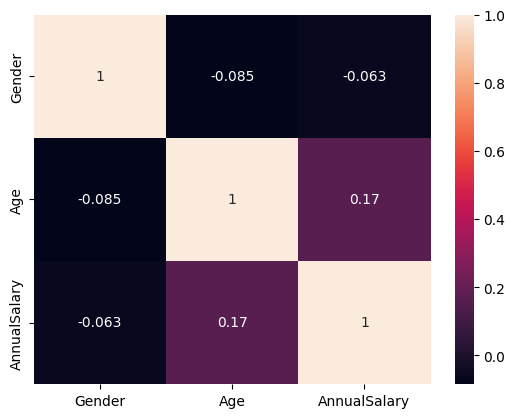

In [134]:
sn.heatmap(cov_mat,annot=True)
plt.show()

computing the eigen vectors and eigen values  for feature space which serve a great purpose in identifying the principal components for our feature space.

In [135]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.2167523  0.95099644 0.83225127]
Eigen values Shape: (3,)
Eigen Vector Shape: (3, 3)


In [137]:
#index for eigen values in descending order
id=eigenvalues.argsort()[::-1]
id

array([0, 1, 2])

In [143]:
# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[id]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,id]

print('eigenvalues in descending order',eigenvalues)
print('eigenvectors in sorted order',eigenvectors)

eigenvalues in descending order [1.2167523  0.95099644 0.83225127]
eigenvectors in sorted order [[ 0.43585271 -0.89306027 -0.11169494]
 [-0.64850775 -0.2255723  -0.72701777]
 [-0.6240754  -0.3893077   0.67747281]]


In [144]:
exp_var=np.cumsum(eigenvalues) / np.sum(eigenvalues)
exp_var

array([0.4055841 , 0.72258291, 1.        ])

Determining the no of components

In [147]:
no_components = np.argmax(exp_var >= 0.50) + 1
no_components

2

In [192]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the PCA-transformed dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and fit Decision Tree Classifier on PCA features
dt_classifier_pca = DecisionTreeClassifier(random_state=42)
dt_classifier_pca.fit(X_train_pca, y_train_pca)

# Make predictions
y_pred_classifier_pca = dt_classifier_pca.predict(X_test_pca)

# Calculate accuracy on PCA features
accuracy_classifier_pca = accuracy_score(y_test_pca, y_pred_classifier_pca)



In [193]:
y_pred_classifier_pca


array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1])

In [194]:
accuracy_classifier_pca

0.86

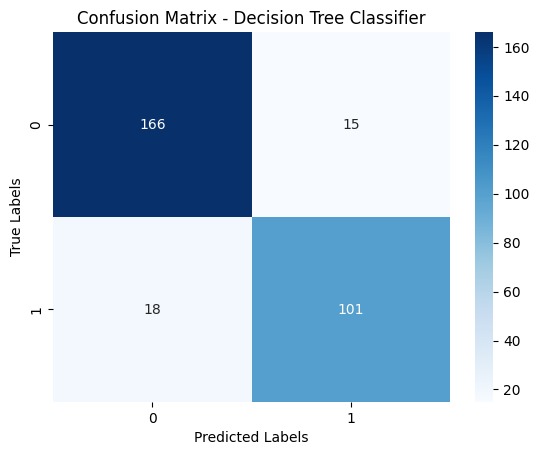

In [160]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualization for Decision Tree Classifier
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



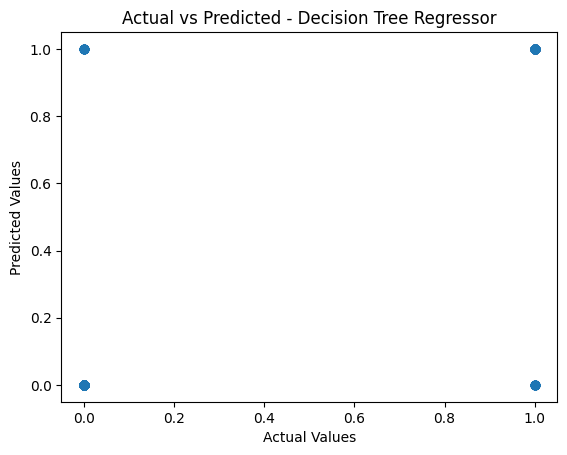

In [158]:
# Visualization for Decision Tree Regressor
plt.scatter(y_test, y_predict_regressor)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Decision Tree Regressor')
plt.show()

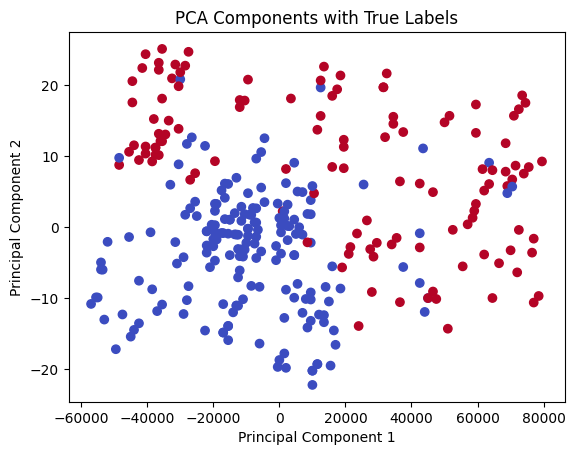

In [159]:
# Visualization for Decision Tree Classifier on PCA features
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Components with True Labels')
plt.show()